In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth



# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과 데이터의 종류 수 만큼 결과 데이터의 칼럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 더 이상 성능 향상이 이루어지지 않는다면 조기 중단 시킬 수 있다.
from tensorflow.keras.callbacks import EarlyStopping

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다. 
gpus = tf.config.experimental.list_physical_devices("GPU")
# gpu가 있다면
if len(gpus) >0 :
    try :
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# SEED 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터 불러오기
df1 = pd.read_csv("data/wine.csv", header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 데이터 나누기
X = df1.drop(12, axis=1)
y = df1[12]


In [5]:
# 모델 가져오기
model = Sequential()

model.add(Dense(30, input_dim=12))
model.add(Activation("relu"))

model.add(Dense(12))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [6]:
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# 조기 중단
# patience : 현재 평가 값이 이전 값보다 좋다고 판단된 경우, 앞으로 n번의 epoch를 더 보고, 
# 더 좋아지지않으면 끝
call1 = EarlyStopping(monitor="val_loss", patience=70)

In [8]:
history = model.fit(X, y, epochs=2000, validation_split=0.2, batch_size=1000, callbacks=[call1])

Epoch 1/2000
6/6 [==============================] - 2s 72ms/step - loss: 0.5985 - accuracy: 0.6011 - val_loss: 0.1685 - val_accuracy: 0.9985
Epoch 2/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.4680 - accuracy: 0.6998 - val_loss: 0.0909 - val_accuracy: 0.9985
Epoch 3/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.4486 - accuracy: 0.7150 - val_loss: 0.1196 - val_accuracy: 0.9985
Epoch 4/2000
6/6 [==============================] - 0s 20ms/step - loss: 0.3993 - accuracy: 0.7766 - val_loss: 0.1892 - val_accuracy: 0.9954
Epoch 5/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.3660 - accuracy: 0.8611 - val_loss: 0.2223 - val_accuracy: 0.9808
Epoch 6/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.3393 - accuracy: 0.8886 - val_loss: 0.2002 - val_accuracy: 0.9723
Epoch 7/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.3177 - accuracy: 0.8940 - val_loss: 0.1760 - val_accuracy: 0.9677
Epoch 8/2000


Epoch 59/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1532 - accuracy: 0.9411 - val_loss: 0.0875 - val_accuracy: 0.9785
Epoch 60/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1508 - accuracy: 0.9413 - val_loss: 0.1029 - val_accuracy: 0.9777
Epoch 61/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.1500 - accuracy: 0.9407 - val_loss: 0.0905 - val_accuracy: 0.9785
Epoch 62/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1464 - accuracy: 0.9430 - val_loss: 0.0955 - val_accuracy: 0.9777
Epoch 63/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.1457 - accuracy: 0.9452 - val_loss: 0.0691 - val_accuracy: 0.9846
Epoch 64/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.1447 - accuracy: 0.9434 - val_loss: 0.1064 - val_accuracy: 0.9731
Epoch 65/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1439 - accuracy: 0.9450 - val_loss: 0.0971 - val_accuracy: 0.9815
Epoch 

6/6 [==============================] - 0s 20ms/step - loss: 0.0909 - accuracy: 0.9729 - val_loss: 0.0598 - val_accuracy: 0.9869
Epoch 117/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0905 - accuracy: 0.9721 - val_loss: 0.0648 - val_accuracy: 0.9854
Epoch 118/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0948 - val_accuracy: 0.9762
Epoch 119/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0957 - accuracy: 0.9696 - val_loss: 0.0606 - val_accuracy: 0.9862
Epoch 120/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0921 - accuracy: 0.9709 - val_loss: 0.0532 - val_accuracy: 0.9869
Epoch 121/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.0606 - val_accuracy: 0.9854
Epoch 122/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0891 - accuracy: 0.9702 - val_loss: 0.0852 - val_accuracy: 0.9785
Epoch 123/2000

6/6 [==============================] - 0s 14ms/step - loss: 0.0692 - accuracy: 0.9794 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 174/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 175/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 176/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 177/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0653 - accuracy: 0.9811 - val_loss: 0.0534 - val_accuracy: 0.9838
Epoch 178/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0664 - accuracy: 0.9810 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 179/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 180/2000

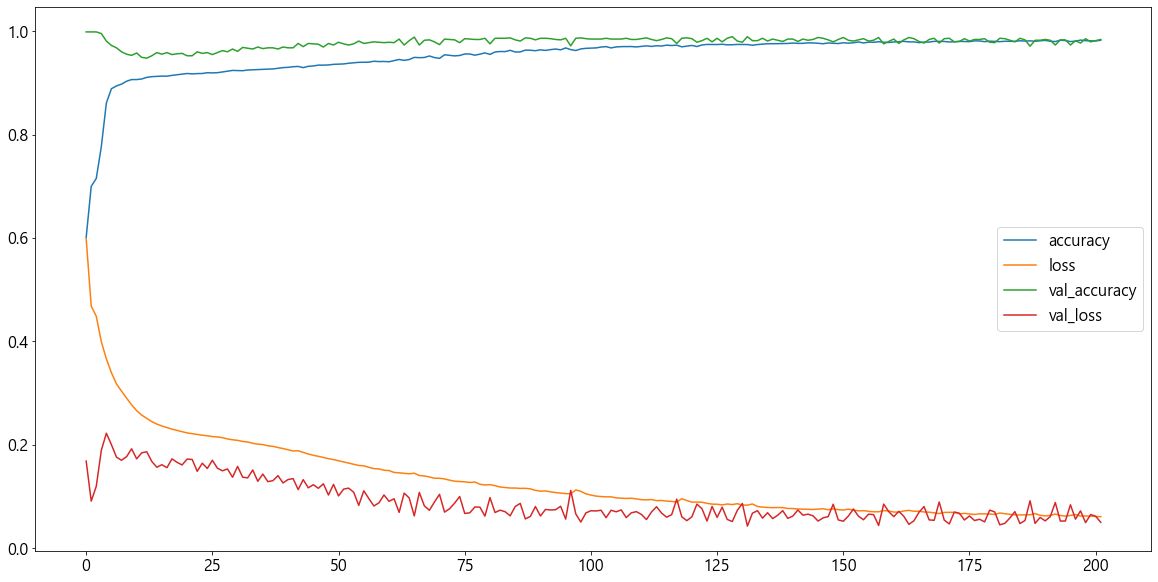

In [9]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
